K-Means

适用：


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'
yf.set_config(proxy="http:127.0.0.1.7897")
dataset=yf.download(symbol,start,end)

# 确保路径存在
save_path = "D:/MyProject/MatContest/dataset/raw"
os.makedirs(save_path, exist_ok=True)
# 保存为 csv 文件
file_name = os.path.join(save_path, "yf2014_2018.csv")
dataset.to_csv(file_name, index=False, encoding="utf-8")
print(f"数据已保存到: {file_name}")

# ---------------- 读取数据 ----------------
file_name = "D:/MyProject/MatContest/dataset/raw/yf2014_2018.csv" # 定义要读取的 CSV 文件路径
dataset = pd.read_csv(file_name)
dataset.head()


[*********************100%***********************]  1 of 1 completed

数据已保存到: D:/MyProject/MatContest/dataset/raw\yf2014_2018.csv


,Close,High,Low,Open,Volume
0,AMD,AMD,AMD,AMD,AMD
1,3.950000047683716,3.9800000190734863,3.8399999141693115,3.8499999046325684,20548400
2,4.0,4.0,3.880000114440918,3.9800000190734863,22887200
3,4.130000114440918,4.179999828338623,3.990000009536743,4.010000228881836,42398300
4,4.179999828338623,4.25,4.110000133514404,4.190000057220459,42932100


预处理数据

In [91]:
dataset_clean = dataset.iloc[1:, :].copy()
# X = dataset_clean[['Open', 'High', 'Low', 'Close','Volume']].values
X = dataset_clean[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float).values


**通过标准差来归一化数据——标准化**

把数据减去平均值后再除以标准差，使得不同特征的量纲一致。这样可以避免某些数值特别大的特征主导模型

归一化 vs 标准化

归一化：x减去数组中最小值然后除以最大值和最小值的差。把数据线性拉伸到 [0,1] 区间，常用于深度学习输入。

标准化：让数据符合均值=0、标准差=1 的分布，常用于统计建模 / 机器学习（SVM、K-means、PCA 等）。

In [92]:
from sklearn.preprocessing import StandardScaler
X = np.nan_to_num(X)    # 把空值由null变为0
# 如果数据里有很多缺失值，可以考虑用 fillna 或插值，而不是直接设 0

Clus_dataSet = StandardScaler().fit_transform(X)# 返回的就是均值为 0、方差为 1 的矩阵，可以直接用来做聚类
Clus_dataSet

array([[-0.64889264, -0.63916156, -0.63417558, -0.62783551, -0.50913086],
       [-0.62210145, -0.63512128, -0.62575591, -0.6175438 , -0.43937661],
       [-0.61591883, -0.59875878, -0.60260195, -0.5907853 ,  0.14253812],
       ...,
       [ 2.7370994 ,  2.78295726,  2.81155688,  2.86105844,  0.72723551],
       [ 2.92463757,  3.06577692,  3.00731329,  3.14716861,  2.26146517],
       [ 3.27910523,  3.40516066,  3.32936419,  3.49502856,  3.77907347]])

K-Means建模

KMeans 是无监督学习算法，用于将数据分成 n_clusters 个簇，使簇内数据点尽量相似，簇间差异尽量大。


In [93]:
from sklearn.cluster import KMeans  # 从 scikit-learn 库导入 KMeans 类，用于执行 K-means 聚类算法
# 定义聚类簇的数量
# 算法会把数据分为3簇，每个簇有一个簇中心
clusterNum = 3
# 创建 KMeans 聚类对象，并指定参数
# init="k-means++"：初始化质心的方法，k-means++ 会选择比较分散的初始点，比随机选择更稳定，通常收敛更快
# 簇的数量，这里是 3
# 表示算法会运行 12 次，每次用不同的初始质心，然后选择效果最好的结果（最小 SSE，平方误差和）
# 加上随机种子，可复现
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, random_state = 0)
# 对数据 X 执行聚类训练
k_means.fit(X)
# 获取每个样本的簇标签
# 一维数组，长度=样本数
labels = k_means.labels_
print(labels)

[1 1 0 ... 0 2 2]


In [94]:
dataset_clean["Prices"] = labels
dataset_clean.head(5)

,Close,High,Low,Open,Volume,Prices
1,3.950000047683716,3.9800000190734863,3.8399999141693115,3.8499999046325684,20548400,1
2,4.0,4.0,3.880000114440918,3.9800000190734863,22887200,1
3,4.130000114440918,4.179999828338623,3.990000009536743,4.010000228881836,42398300,0
4,4.179999828338623,4.25,4.110000133514404,4.190000057220459,42932100,0
5,4.179999828338623,4.260000228881836,4.139999866485596,4.230000019073486,30678700,1


In [95]:
dataset_clean.groupby('Prices').mean(numeric_only=True)

""
Prices
0
1
2


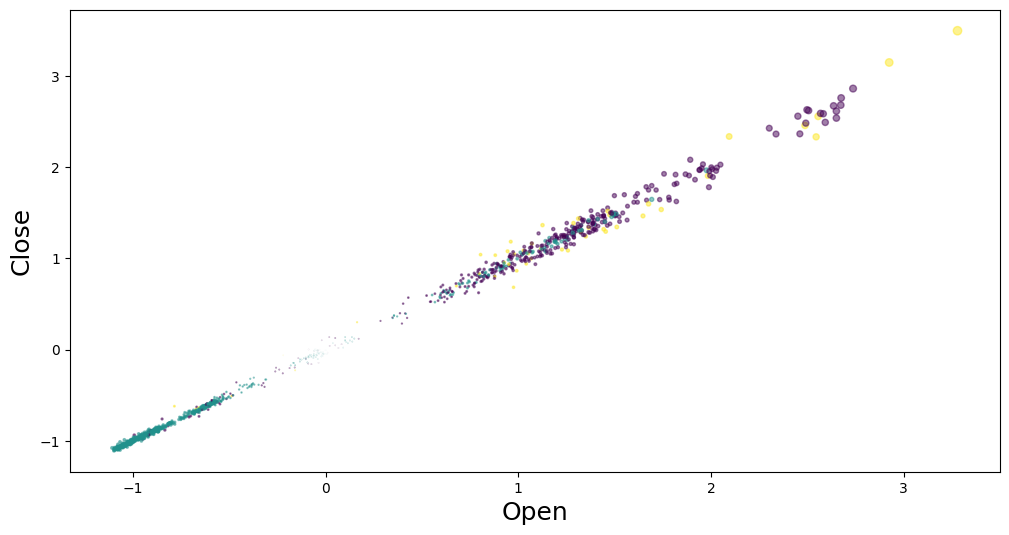

In [100]:
# 用聚类数据画图
area = np.pi * (Clus_dataSet[:, 1])**2
plt.figure(figsize=(12, 6))
plt.scatter(Clus_dataSet[:, 0], Clus_dataSet[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Open', fontsize = 18)
plt.ylabel('Close', fontsize = 18)
plt.show()

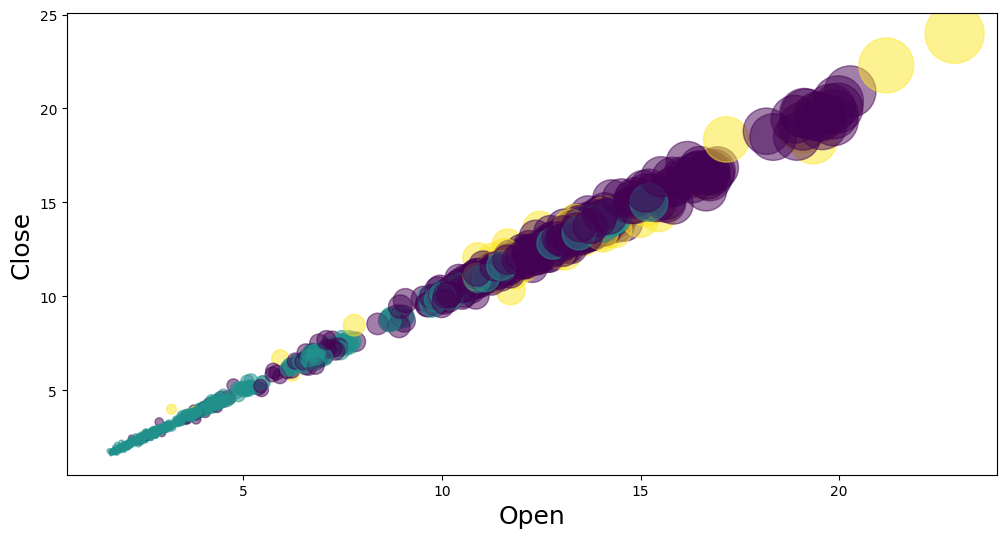

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# 用原始数据画图
area1 = np.pi * (X[:, 1])**2  # 用 High 作为气泡大小
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 3], s=area1, c=labels.astype(float), alpha=0.5)
plt.xlabel('Open', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.show()


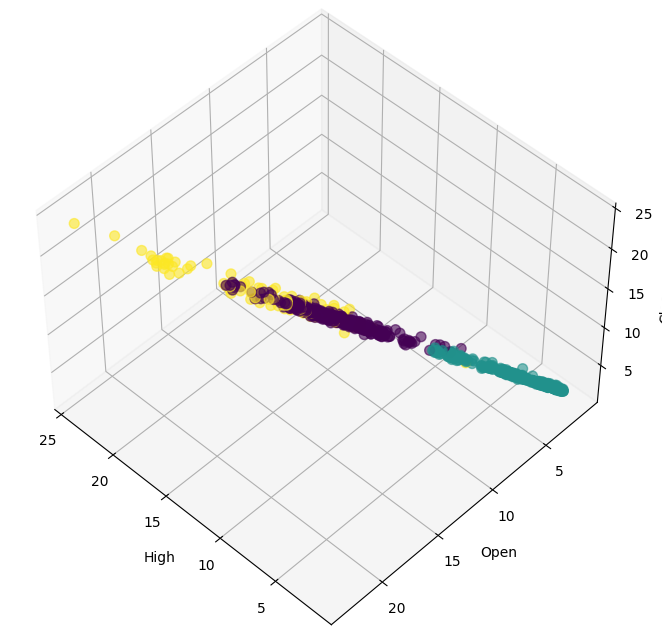

In [103]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)

# X[:,1]=High, X[:,0]=Open, X[:,3]=Close
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=labels.astype(float), s=50, alpha=0.6)

ax.set_xlabel('High')
ax.set_ylabel('Open')
ax.set_zlabel('Close')

plt.show()
